In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
import numpy as np
np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [6]:
np.min(y_train), np.max(y_train)

(np.uint8(0), np.uint8(9))

In [7]:
x_train = x_train/255
x_test   = x_test/ 255

In [37]:
model1 = keras.Sequential()

model1.add(keras.layers.Input(shape=(28,28)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dense(256, activation='relu'))

model1.add(keras.layers.Dense(10, activation='softmax'))


model1.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [38]:
hist1= model1.fit(x_train,y_train,epochs=50,batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6582 - loss: 0.9801 - val_accuracy: 0.8326 - val_loss: 0.4653
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.4387 - val_accuracy: 0.8566 - val_loss: 0.4000
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3866 - val_accuracy: 0.8659 - val_loss: 0.3711
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 0.3593 - val_accuracy: 0.8640 - val_loss: 0.3683
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8741 - loss: 0.3401 - val_accuracy: 0.8714 - val_loss: 0.3562
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8779 - loss: 0.3278 - val_accuracy: 0.8732 - val_loss: 0.3520
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8831 - loss: 0.3173 - val_accuracy: 0.8760 - val_loss: 0.3417
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8855 - loss: 0.3081 - val_accuracy: 0

In [42]:
model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(28, 28, 1)))
model2.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model2.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model2.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))


model2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])



In [43]:
model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 6, 6, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387,594 (1.48 MB)

 Trainable params: 387,594 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.5592 - loss: 1.2133 - val_accuracy: 0.8045 - val_loss: 0.5252
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8164 - loss: 0.4983 - val_accuracy: 0.8432 - val_loss: 0.4341
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8528 - loss: 0.4051 - val_accuracy: 0.8552 - val_loss: 0.3980
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8667 - loss: 0.3602 - val_accuracy: 0.8739 - val_loss: 0.3491
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8796 - loss: 0.3280 - val_accuracy: 0.8843 - val_loss: 0.3142
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8933 - loss: 0.2903 - val_accuracy: 0.8924 - val_loss: 0.2950
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8964 - loss: 0.2794 - val_accuracy: 0.8958 - val_loss: 0.2888
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9005 - loss: 0.2716 - val_acc

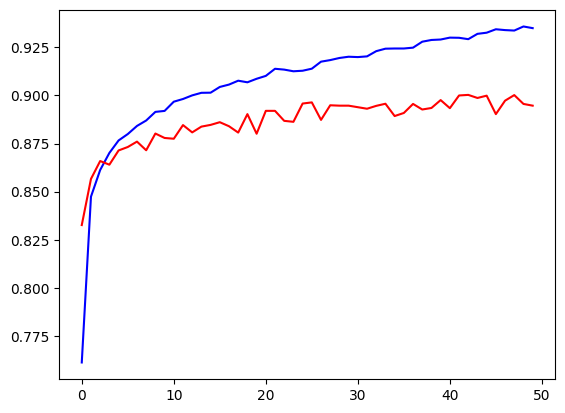

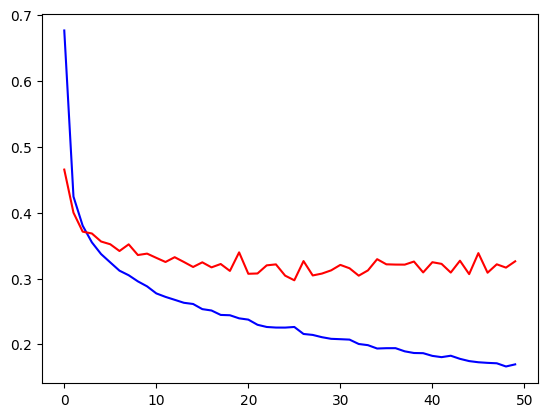

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist1.history['accuracy'], color='blue')
plt.plot(hist1.history['val_accuracy'],color='red')

plt.figure()
plt.plot(hist1.history['loss'], color='blue')
plt.plot(hist1.history['val_loss'],color='red')

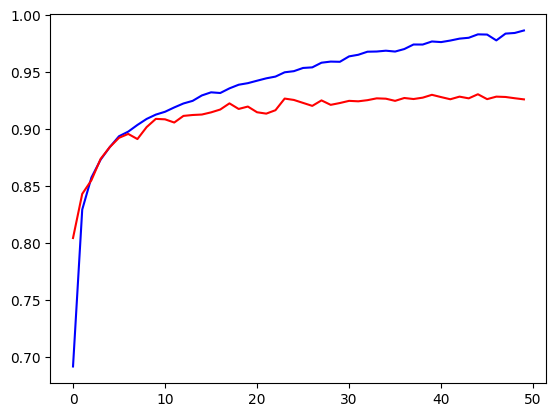

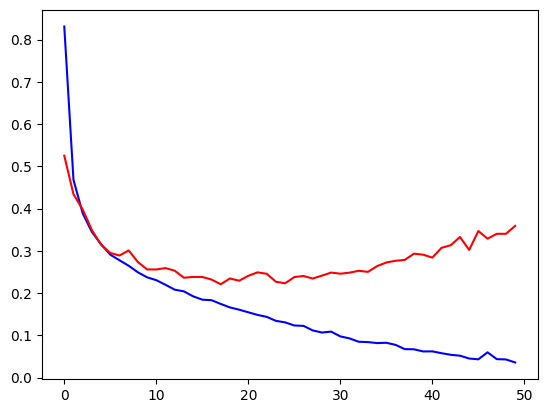

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist2.history['accuracy'], color='blue')
plt.plot(hist2.history['val_accuracy'],color='red')

plt.figure()
plt.plot(hist2.history['loss'], color='blue')
plt.plot(hist2.history['val_loss'],color='red')